# Radiative-Convective Equilibrium with CAM3 scheme

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

#  Simpler coupled RCE model setup

By initializing each component with the same state object, the components are already effectively coupled. They all act to modify the same state object.

No extra coupling code is necessary.

In [2]:
# initial state (temperatures)
state = climlab.column_state(num_lev=30, num_lat=1, water_depth=5.)

In [3]:
#  Create a parent process
rce = climlab.TimeDependentProcess(state=state)
## Create individual physical process models:
#  fixed relative humidity
h2o = climlab.radiation.water_vapor.ManabeWaterVapor(state=state)
#  Hard convective adjustment
convadj = climlab.convection.convadj.ConvectiveAdjustment(state=state, adj_lapse_rate=6.5)
# CAM3 radiation with default parameters and interactive water vapor
rad = climlab.radiation.CAM3Radiation(state=state, q=h2o.q)
rad.q = h2o.q

# Couple the models
rce.add_subprocess('Radiation', rad)
rce.add_subprocess('ConvectiveAdjustment', convadj)
rce.add_subprocess('H2O', h2o)

#  Make diagnostic water vapor field easy to access
rce.q = rce.subprocess.H2O.q

Extension _cam3_radiation is up to date


In [4]:
print rce

climlab Process of type <class 'climlab.process.time_dependent_process.TimeDependentProcess'>. 
State variables and domain shapes: 
  Tatm: (30,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
   ConvectiveAdjustment: <class 'climlab.convection.convadj.ConvectiveAdjustment'>
   H2O: <class 'climlab.radiation.water_vapor.ManabeWaterVapor'>
   Radiation: <class 'climlab.radiation.cam3rad.CAM3Radiation'>



In [5]:
rce.state

{'Tatm': Field([ 200.        ,  202.68965517,  205.37931034,  208.06896552,
         210.75862069,  213.44827586,  216.13793103,  218.82758621,
         221.51724138,  224.20689655,  226.89655172,  229.5862069 ,
         232.27586207,  234.96551724,  237.65517241,  240.34482759,
         243.03448276,  245.72413793,  248.4137931 ,  251.10344828,
         253.79310345,  256.48275862,  259.17241379,  261.86206897,
         264.55172414,  267.24137931,  269.93103448,  272.62068966,
         275.31034483,  278.        ]), 'Ts': Field([ 288.])}

In [6]:
rce.integrate_years(5)

Integrating for 1826 steps, 1826.211 days, or 5 years.
Total elapsed time is 4.99942230115 years.


In [7]:
rce.state

{'Tatm': Field([ 141.47026784,  170.77322533,  188.2132851 ,  200.66276413,
         210.49569574,  218.69199084,  225.75813873,  231.99237653,
         237.58612983,  242.67007475,  247.33764945,  251.65812831,
         255.68438623,  259.45775655,  263.01120234,  266.37146118,
         269.56053957,  272.59678114,  275.49564733,  278.27029903,
         280.93203753,  283.49064378,  285.95464311,  288.33151428,
         290.62785641,  292.84952367,  295.0017349 ,  297.08916362,
         299.11601259,  301.08607583]), 'Ts': Field([ 302.05089966])}

In [8]:
rce.q

Field([  5.00000000e-06,   5.00000000e-06,   5.00000000e-06,
         5.00000000e-06,   5.67996182e-06,   1.63802087e-05,
         3.78954938e-05,   7.55114592e-05,   1.35165082e-04,
         2.23251578e-04,   3.46465636e-04,   5.11674666e-04,
         7.25819408e-04,   9.95837010e-04,   1.32860215e-03,
         1.73088254e-03,   2.20930572e-03,   2.77033484e-03,
         3.42025138e-03,   4.16514339e-03,   5.01089803e-03,
         5.96319742e-03,   7.02751712e-03,   8.20912657e-03,
         9.51309114e-03,   1.09442753e-02,   1.25073465e-02,
         1.42067803e-02,   1.60468650e-02,   1.80317076e-02])

In [9]:
rce.subprocess.Radiation.input

{'CFC11': 1e-09,
 'CFC12': 1e-09,
 'CH4': 1e-09,
 'CO2': 380.0,
 'N2O': 1e-09,
 'O3': Field([  1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09,
          1.00000000e-09,   1.00000000e-09,   1.00000000e-09]),
 'aldif': Field([ 0.07]),
 'aldir': Field([ 0.07]),
 'asdif': Field([ 0.07]),
 'asdir': Field([ 0.07]),
 'ciwp': Field([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 'cld

# Latitudinally, seasonally varying RCE

In [10]:
# initial state (temperatures)
state2 = climlab.column_state(num_lev=30, num_lat=30, water_depth=10.)

In [11]:
#  Create a parent process
rcelat = climlab.TimeDependentProcess(state=state2)
## Create individual physical process models:
#  seasonal insolation
insol = climlab.radiation.insolation.DailyInsolation(domains=rcelat.Ts.domain)
#  fixed relative humidity
h2o = climlab.radiation.water_vapor.ManabeWaterVapor(state=state2)
#  Hard convective adjustment
convadj = climlab.convection.convadj.ConvectiveAdjustment(state=state2, adj_lapse_rate=6.5)
# CAM3 radiation with default parameters and interactive water vapor
rad = climlab.radiation.CAM3Radiation(state=state2)
#  Couple the insolation and water vapor to radiation process
rad.q = h2o.q
rad.insolation = insol.insolation

# Add all subprocesses to the parent process
rcelat.add_subprocess('Insolation', insol)
rcelat.add_subprocess('Radiation', rad)
rcelat.add_subprocess('ConvectiveAdjustment', convadj)
rcelat.add_subprocess('H2O', h2o)

#  Make diagnostic water vapor field easy to access
rcelat.q = rcelat.subprocess.H2O.q

Extension _cam3_radiation is up to date


In [12]:
rcelat.integrate_years(5)

Integrating for 1826 steps, 1826.211 days, or 5 years.
Total elapsed time is 4.99942230115 years.


In [13]:
rcelat.integrate_years(1)

Integrating for 365 steps, 365.2422 days, or 1 years.
Total elapsed time is 5.99875917953 years.


In [14]:
def plot_temp_section(model, timeave=True):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if timeave:
        field = model.timeave['Tatm'].transpose()
    else:
        field = model.Tatm.transpose()
    cax = ax.contourf(model.lat, model.lev, field)
    ax.invert_yaxis()
    ax.set_xlim(-90,90)
    ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
    fig.colorbar(cax)

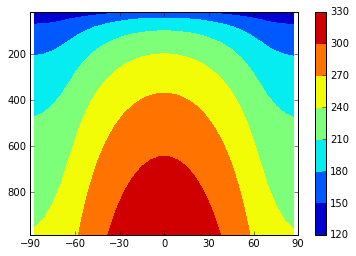

In [15]:
plot_temp_section(rcelat)

# Same thing, but also including meridional temperature diffusion

In [16]:
###  Normally we can clone a model with process_like() but it currently fails for compiled Fortran extensions.
#diffmodel = climlab.process_like(rcelat)

In [17]:
# initial state (temperatures)
state3 = climlab.column_state(num_lev=30, num_lat=30, water_depth=10.)

In [18]:
#  Create a parent process
diffmodel = climlab.TimeDependentProcess(state=state3)

## Create individual physical process models:
#  seasonal insolation
insol = climlab.radiation.insolation.DailyInsolation(domains=diffmodel.Ts.domain)
#  fixed relative humidity
h2o = climlab.radiation.water_vapor.ManabeWaterVapor(state=state3)
#  Hard convective adjustment
convadj = climlab.convection.convadj.ConvectiveAdjustment(state=state3, adj_lapse_rate=6.5)
# CAM3 radiation with default parameters and interactive water vapor
rad = climlab.radiation.CAM3Radiation(state=state3)
rad.q = h2o.q
rad.insolation = insol.insolation

# Couple the models
diffmodel.add_subprocess('Insolation', insol)
diffmodel.add_subprocess('Radiation', rad)
diffmodel.add_subprocess('ConvectiveAdjustment', convadj)
diffmodel.add_subprocess('H2O', h2o)

#  Make diagnostic water vapor field easy to access
diffmodel.q = diffmodel.subprocess.H2O.q

Extension _cam3_radiation is up to date


In [19]:
# thermal diffusivity in W/m**2/degC
D = 0.05
# meridional diffusivity in 1/s
K = D / diffmodel.Tatm.domain.heat_capacity[0]
print K

1.46414342629e-07


In [20]:
d = climlab.dynamics.diffusion.MeridionalDiffusion(K=K, state={'Tatm': diffmodel.state['Tatm']}, **diffmodel.param)

In [21]:
diffmodel.add_subprocess('diffusion', d)

In [22]:
diffmodel.integrate_years(5)

Integrating for 1826 steps, 1826.211 days, or 5 years.
Total elapsed time is 4.99942230115 years.


In [23]:
diffmodel.integrate_years(1)

Integrating for 365 steps, 365.2422 days, or 1 years.
Total elapsed time is 5.99875917953 years.


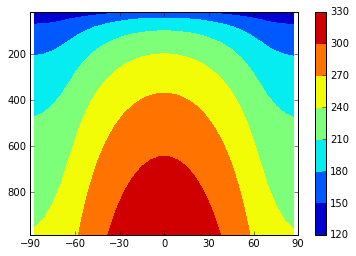

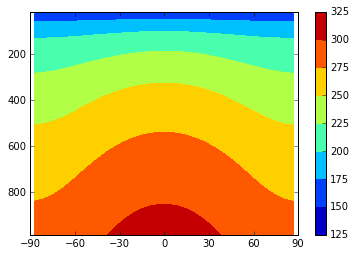

In [24]:
plot_temp_section(rcelat)
plot_temp_section(diffmodel)

In [25]:
def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )


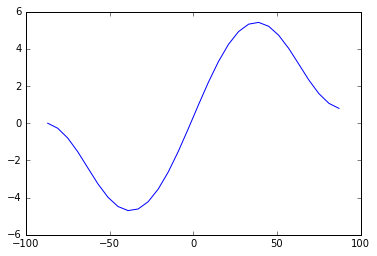

In [26]:
#  Plot the northward heat transport in this model
Rtoa = np.squeeze(diffmodel.timeave['ASR'] - diffmodel.timeave['OLR'])
plt.plot(diffmodel.lat, inferred_heat_transport(Rtoa, diffmodel.lat))